In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import thermoextrap.xtrapy.idealgas as idealgas
import thermoextrap.xtrapy.xpan_beta as xpan_beta
from tqdm.notebook import tqdm
import xarray as xr
import cmomy
import numpy as np

In [4]:
from importlib import reload

In [5]:
betas = np.arange(0.1, 10.0, 0.5)

In [6]:
beta = 5.0
vol = 1.0
npart = 1000
nconfig = 10_000
order = 4

In [7]:
xv, uv = idealgas.generate_data((nconfig, npart), beta, vol)

In [8]:
from tqdm import tqdm_notebook

In [9]:
out = []

In [10]:
for nsamp in tqdm(range(100)):
    xv, uv = idealgas.generate_data((nconfig, npart), beta, vol)
    ave = xpan_beta.DataCentralMoments.from_vals(xv, uv, order)
    out.append(ave.values)

    

/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numba/core/dispatcher.py:238: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  entrypoints.init_all()


KeyboardInterrupt: 

In [26]:
data = xpan_beta.DataCentralMoments.from_data(
    xr.concat(out, dim='rec'),
    central=False)

In [27]:
xem = xpan_beta.factory_extrapmodel(beta, data)
xem_r = xpan_beta.factory_extrapmodel(beta, data.reduce('rec'))

In [28]:
betas = np.arange(0.1, 10.0, 0.5)

In [29]:
xem_rep = xem.resample(nrep=1000)

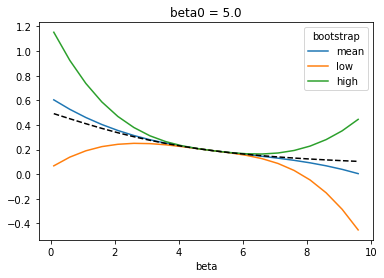

In [38]:
(
    xem
    .resample(nrep=1000, rep='rec')
    .predict(betas, order=3)
    .pipe(cmomy.xbootstrap_confidence_interval, dim='rec')
    .plot(hue='bootstrap')
    
)

plt.plot(betas, idealgas.x_ave(betas, vol), 'k--')


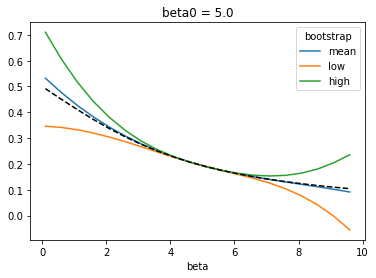

In [137]:
(
    xem_rep.predict(betas, order=3)
    .pipe(cmomy.xbootstrap_confidence_interval, stats_val='mean', dim='rep')
    .plot(hue='bootstrap')
)
plt.plot(betas, idealgas.x_ave(betas, vol), 'k--')


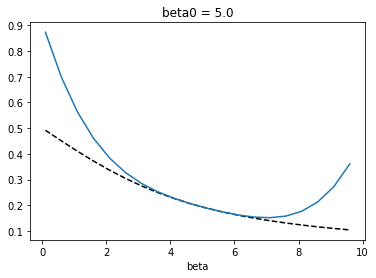

In [97]:
plt.plot(betas, idealgas.x_ave(betas, vol), 'k--')
xem_r.predict(betas, order=4).plot(hue='rec')